Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Open required data frames. PATH, FLIGHT DATA, ERROR AND FEATURES

In [2]:
#Select which path you wanna visualize.
path_num = 1
intPoints_list = []

energy_df = pd.read_csv('../data_base/paths_energy/features_pathv9_pc76_1.csv', sep=",")
fd_df = pd.read_csv('../data_base/flight_data/fd_pathv9_pc76_1.txt', sep="|")
path_df = pd.read_csv('../data_base/random_paths/path_v9_pc76.txt', sep="|")

#Select only data from desired path
current_fdPoint_info = fd_df.loc[(fd_df['route_num'] == path_num)]
current_features_info = energy_df.loc[(energy_df['path_num'] == path_num)]

Graficas de posicion deseada vs posicion simulada.

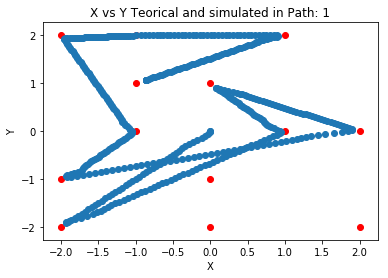

In [3]:
#Extract points in path for graph
for idex_path, row_path_specs in path_df.iterrows():
    #Retrieves lists of points for each path
    points_list = list(row_path_specs.loc['points'].split(';')) 
    if idex_path+1 == path_num:
        for i in points_list:
            intPoints = list(map(int,i.split(','))) #convert time strings to int
            intPoints_list.append(intPoints)
        break
#Graph extracted points
for loc in intPoints_list:
    plt.scatter(loc[0], loc[1], color='red')

plt.scatter(current_fdPoint_info['pos_x'], current_fdPoint_info['pos_y'])
plt.title('X vs Y Teorical and simulated in Path: ' + str(path_num))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


Energy depending of distance.

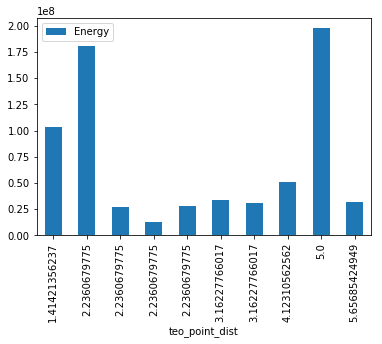

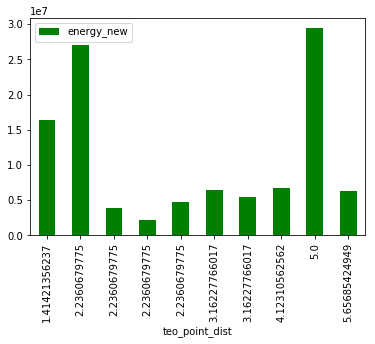

In [4]:
#Plot energy used depending of distance.
sortedDF_dist = current_features_info.sort_values(by=['teo_point_dist'])
sortedDF_dist.plot(x='teo_point_dist', y = 'Energy', kind = 'bar')
sortedDF_dist.plot(x='teo_point_dist', y = 'energy_new', kind = 'bar', color='green')

Energy depending on axis distance

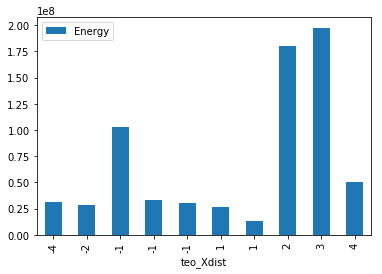

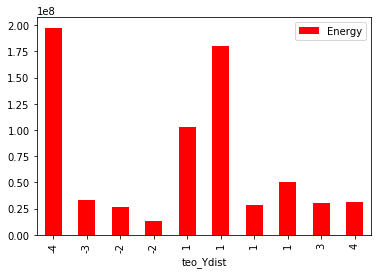

In [5]:
#Plot energy used depending of axis distance.
current_features_info['teo_Xdist'].abs()
sortedDF_distX = current_features_info.sort_values(by=['teo_Xdist'])
sortedDF_distX.plot(x='teo_Xdist', y = 'Energy', kind = 'bar')

current_features_info['teo_Ydist'].abs()
sortedDF_distX = current_features_info.sort_values(by=['teo_Ydist'])
sortedDF_distX.plot(x='teo_Ydist', y = 'Energy', kind = 'bar', color = 'red')

Energy depending of time.

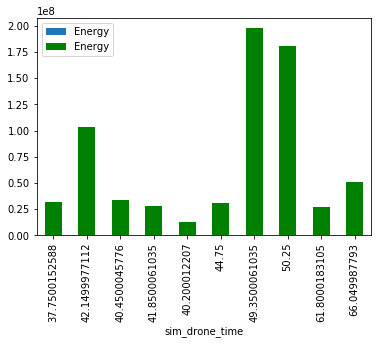

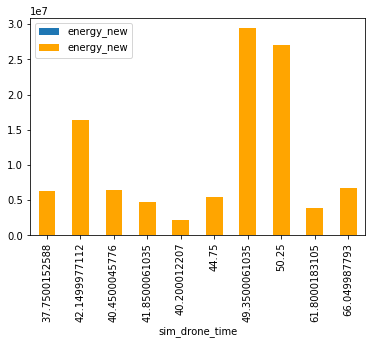

In [6]:
#Plot energy used depending of time.
sortedDF_time = current_features_info.sort_values(by=['teo_point_time'])
ax = sortedDF_time.plot(x='teo_point_time', y = 'Energy', kind = 'bar')
sortedDF_time.plot(x='sim_drone_time', y = 'Energy', kind = 'bar', ax=ax, color='green')

#Plot energy used depending of time.
sortedDF_time = current_features_info.sort_values(by=['teo_point_time'])
ax = sortedDF_time.plot(x='teo_point_time', y = 'energy_new', kind = 'bar')
sortedDF_time.plot(x='sim_drone_time', y = 'energy_new', kind = 'bar', ax=ax, color='orange')

Energy depending of velocity.

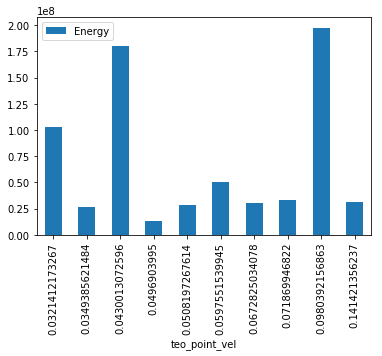

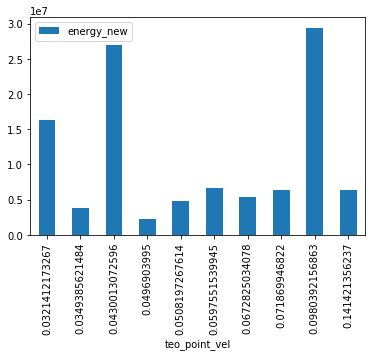

In [7]:
sortedDF_time = current_features_info.sort_values(by=['teo_point_vel'])
sortedDF_time.plot(x='teo_point_vel', y = 'Energy', kind = 'bar')

sortedDF_time = current_features_info.sort_values(by=['teo_point_vel'])
sortedDF_time.plot(x='teo_point_vel', y = 'energy_new', kind = 'bar')

Energy used in each point.

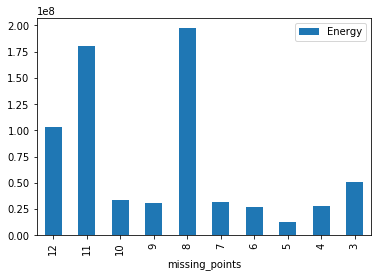

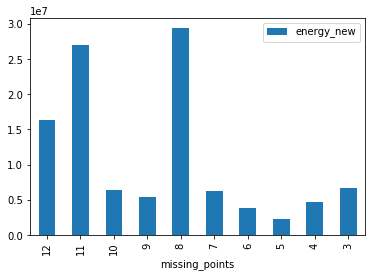

In [8]:
#Plot energy used in each point.
current_features_info.plot(x='missing_points', y = 'Energy', kind = 'bar')
current_features_info.plot(x='missing_points', y = 'energy_new', kind = 'bar')